# ETL PI MLOps

Importación de librerias necesarias para el proyeco:

In [1]:
import json
import os
import pandas as pd
import gzip
import ast
import numpy as np
import re
import matplotlib.pyplot as plt
from fastapi import FastAPI, HTTPException
from datetime import datetime
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from datetime import datetime 

# ETL

En este apartado empezamos la extracción y transformación de los datos para poder trabajarlos.

## 1 - Extracción (Extract):

### a) Función para abrir Datasets sin Problemas:

In [2]:
def abrir_python(archivo):
    lista_de_datos = []  # Creamos una lista para almacenar los datos
    with gzip.open(archivo, "rb") as file:  # Abrimos el archivo gzip en modo binario para lectura
        for line in file:  # Iteramos sobre cada línea del archivo
            decode_line = line.decode("utf-8")  # Decodificamos la línea como UTF-8
            # Utilizamos ast.literal_eval() para evaluar la línea como una expresión literal de Python
            # Esto es seguro si los datos son literales de Python válidos
            lista_de_datos.append(ast.literal_eval(decode_line.strip()))  # Agregamos los datos a la lista
    return lista_de_datos  # Devolvemos la lista de datos

### b)Función para abrir Datasets con Problemas:

In [3]:
def abrir_games(archivo):
    lista_de_datos = []  # Creamos una lista para almacenar los datos
    with gzip.open(archivo, "rt", encoding="utf-8") as file:  # Abrimos el archivo gzip en modo texto
        for line in file:  # Iteramos sobre cada línea del archivo
            try:
                data = json.loads(line.strip())  # Utilizamos json.loads para cargar el JSON de manera segura
                lista_de_datos.append(data)  # Agregamos los datos a la lista
            except json.JSONDecodeError as e:
                print(f"Error en línea: {line.strip()}")
                print(e)
    return lista_de_datos  # Devolvemos la lista de datos

### c) Cargamos los Datasets

In [4]:
# Especificamos la ruta de los archivos comprimidos
carpeta = "..\PI_MLOps-STEAM_DATA"
archivo1 = os.path.join(carpeta, "user_reviews.json.gz")
archivo2 = os.path.join(carpeta, "users_items.json.gz")
archivo3 = os.path.join(carpeta, "steam_games.json.gz")

# Llamamos a la función para abrir y descomprimir los archivos
data1 = abrir_python(archivo1)
data2 = abrir_python(archivo2)
data3 = abrir_games(archivo3)

# Creamos un DataFrame a partir de los datos
df_revi = pd.DataFrame(data1)
df_item = pd.DataFrame(data2)
df_game = pd.DataFrame(data3)

# Mostramos el DataFrame
display(df_revi)
display(df_item)
display(df_game)


,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"



    Desenlace de df"s para que sea más fácil volver a cargarlos al trabajarlos.

In [5]:
df_reviews = df_revi
df_items = df_item
df_games = df_game

# 2 - Transformación (Transform):

## a) Desanidación de diccionarios internos:

    Función que extrae valores de una columna de un DataFrame que contiene listas de diccionarios en una columna específica y crea nuevas columnas para cada clave especificada.

In [6]:
def extraer_diccionarios(df, columna_dicc, keys, nuevas_columnas):

    # Creamos una lista de diccionarios para almacenar las filas extraídas
    filas_reviews = []
    
    # Iterar a través de las filas del DataFrame df_ 
    for indice, row in df.iterrows():
        reviews = row[columna_dicc]
        user_id = row["user_id"]

        # Comprobar si "items" es una lista de diccionarios
        if isinstance(reviews, list):
            # Iteramos entre filas del df_ 
            for item in reviews:
                fila_extraida = {"user_id": user_id}
                # Iteramos entre filas de la columna diccionario 
                for key, name in zip(keys, nuevas_columnas):
                    # Busco el par clave valor...
                    par_clave_valor = item.get(key, "")
                    # ... y lo agrego a la lista con los user_id
                    fila_extraida[name] = par_clave_valor
                    # Guardo todo en una lista
                filas_reviews.append(fila_extraida)

    # Crear un nuevo DataFrame a partir de la lista de diccionarios
    df_nuevo = pd.DataFrame(filas_reviews)

    return df_nuevo

## b) - Extracción de Reviews en Users Reviews

In [7]:
keys = ["funny", "posted", "last_edited", "item_id", "helpful", "recommend", "review"]
nuevas_columnas = ["funny", "posted", "last_edited", "item_id", "helpful", "recommend", "review"]
df_reviews_reviews = extraer_diccionarios(df_reviews, "reviews", keys, nuevas_columnas)

# Mostrar el DataFrame resultante
df_reviews_reviews.head()

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


## c) - Extraccióm de Items en User Items

In [8]:
keys = ["item_id", "item_name", "playtime_forever", "playtime_2weeks"]
nuevas_columnas = ["item_id", "item_name", "playtime_forever", "playtime_2weeks", "user_id"]
df_items_items = extraer_diccionarios(df_items, "items", keys, nuevas_columnas)

# Mostrar el DataFrame resultante
df_items_items.head()

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,50,Half-Life: Opposing Force,0,0


## d) Transformación de "price" a float en df_games

    Reemplazar "Free To Play" por "0" y luego convertir la columna a float:

In [9]:
def reemplaza_free_to_play(price):

  if price == "Free To Play":
    return 0
  else:
    return price


df_games["price"] = df_games["price"].apply(reemplaza_free_to_play)
df_games["price"] = pd.to_numeric(df_games["price"], errors="coerce")
print(df_games["price"].dtype)

float64


## e) Eliminar Filas Nulas

    Este apartado elimina la fila del df que contenga almenos un falor nulo en los datos. No debería quedar ninguna fila con almenos un valor nulo.

In [10]:
print("Antes:")
print("- df_reviews: ", len(df_reviews))
print("- df_reviews_reviews: ", len(df_reviews_reviews))
print("- df_items: ", len(df_items))
print("- df_items_items: ", len(df_items_items))
print("- df_games: ", len(df_games))

# Eliminar filas con al menos un valor nulo en df_reviews
df_reviews = df_reviews.dropna(axis=0, how="any")

# Eliminar filas con al menos un valor nulo en df_reviews
df_reviews_reviews = df_reviews_reviews.dropna(axis=0, how="any")

# Eliminar filas con al menos un valor nulo en df_items
df_items = df_items.dropna(axis=0, how="any")

# Eliminar filas con al menos un valor nulo en df_items
df_items_items = df_items_items.dropna(axis=0, how="any")

# Eliminar filas con al menos un valor nulo en df_games
df_games = df_games.dropna(axis=0, how="any")

print("Despues:")
print("- df_reviews: ", len(df_reviews))
print("- df_reviews_reviews: ", len(df_reviews_reviews))
print("- df_items: ", len(df_items))
print("- df_items_items: ", len(df_items_items))
print("- df_games: ", len(df_games))

Antes:
- df_reviews:  25799
- df_reviews_reviews:  59305
- df_items:  88310
- df_items_items:  5153209
- df_games:  120445
Despues:
- df_reviews:  25799
- df_reviews_reviews:  59305
- df_items:  88310
- df_items_items:  5153209
- df_games:  21559


## f) Detectar filas duplicadas en un DataFrame.

In [11]:
print(len(df_reviews_reviews))
df_reviews_reviews = df_reviews_reviews.drop_duplicates(subset=["user_id", "item_id"])
print(len(df_reviews_reviews))

59305
58431


In [12]:
print(len(df_items_items))
df_items_items = df_items_items.drop_duplicates(subset=["user_id", "item_id"])
print(len(df_items_items))

5153209
5094082


In [13]:
print(len(df_games))
df_games = df_games.drop_duplicates(subset=["id"])
print(len(df_games))

21559
21558


In [14]:
print(len(df_reviews))
df_reviews = df_reviews.drop_duplicates(subset=["user_id", "user_url"])
print(len(df_reviews))

25799
25485


In [15]:
print(len(df_items))
df_items = df_items.sort_values(by="items_count", ascending=False)
df_items = df_items.drop_duplicates(subset="steam_id", keep="last")
print(len(df_items))

88310
87625


## g) Transformacion de la fecha de df_reviews_reviews

    Debido a que utilizaremos la fecha para algunas de las funciones debemos mantener un formato correcto para su utilización.

In [16]:
# Función para convertir la fecha
def convert_date(date_str):
    # Utilizar expresiones regulares para extraer el mes, día y anio
    match = re.search(r"(\w+) (\d{1,2}), (\d{4})", date_str)
    if match:
        month_str, day_str, year_str = match.groups()
        
        # Mapear nombres de meses a números
        dicc_mes = {
            "January": "01",
            "February": "02",
            "March": "03",
            "April": "04",
            "May": "05",
            "June": "06",
            "July": "07",
            "August": "08",
            "September": "09",
            "October": "10",
            "November": "11",
            "December": "12"
        }
        
        # Formatear la fecha como "YYYY/MM/DD"
        fecha_formateada = f"{year_str}/{dicc_mes[month_str]}/{day_str}"
        
        return fecha_formateada
    else:
        return None

In [17]:
# Aplicar la función a la columna "posted" del DataFrame
df_reviews_reviews["posted"] = df_reviews_reviews["posted"].apply(convert_date)
print(df_reviews_reviews)

                 user_id                             funny      posted  \
0      76561197970982479                                     2011/11/5   
1      76561197970982479                                    2011/07/15   
2      76561197970982479                                    2011/04/21   
3                js41637                                    2014/06/24   
4                js41637                                     2013/09/8   
...                  ...                               ...         ...   
59300  76561198312638244                                          None   
59301  76561198312638244                                          None   
59302        LydiaMorley  1 person found this review funny        None   
59303        LydiaMorley                                          None   
59304        LydiaMorley                                          None   

      last_edited item_id                                          helpful  \
0                    1250        

## h) Eliminacón de columnas Desanidadas

In [18]:
df_items = df_items.drop("items", axis=1)
df_items

,user_id,items_count,steam_id,user_url
3708,phrostb,7762,76561198102767019,http://steamcommunity.com/id/phrostb
19055,thugnificent,6700,76561198000537256,http://steamcommunity.com/id/thugnificent
1104,chidvd,6410,76561198001518866,http://steamcommunity.com/id/chidvd
6022,piepai,6132,76561198118965684,http://steamcommunity.com/id/piepai
5995,mayshowganmore,5027,76561198048151962,http://steamcommunity.com/id/mayshowganmore
...,...,...,...,...
64247,76561198068729484,0,76561198068729484,http://steamcommunity.com/profiles/76561198068...
28383,76561198052591193,0,76561198052591193,http://steamcommunity.com/profiles/76561198052...
64244,76561198068726861,0,76561198068726861,http://steamcommunity.com/profiles/76561198068...
6127,76561198072031386,0,76561198072031386,http://steamcommunity.com/profiles/76561198072...


In [19]:
df_reviews = df_reviews.drop("reviews", axis=1)
df_reviews

,user_id,user_url
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,http://steamcommunity.com/id/js41637
2,evcentric,http://steamcommunity.com/id/evcentric
3,doctr,http://steamcommunity.com/id/doctr
4,maplemage,http://steamcommunity.com/id/maplemage
...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...


## i) Convertir "user_id" e "item_id" a tipos numéricos si es posible

    Esto nos ayudara en el tratamiento de los datos por Id en las funciones.

In [20]:

df_items_items["user_id"] = pd.to_numeric(df_items_items["user_id"], errors="coerce")
df_items_items["item_id"] = pd.to_numeric(df_items_items["item_id"], errors="coerce")

# EDA

    El análisis EDA será corto debido a que los datos estan correctos. Al parecer el sistema de recolección de informacón de STEAM funciona bien.

### a) Aquí se presenta una breve Descripción e Información de los Datasets que se van a utilizar.

In [21]:
print("\nPrimeros registros de df_items_items:")
print(df_items_items.info())


Primeros registros de df_items_items:
<class 'pandas.core.frame.DataFrame'>
Index: 5094082 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           float64
 1   item_id           int64  
 2   item_name         object 
 3   playtime_forever  int64  
 4   playtime_2weeks   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 233.2+ MB
None


In [22]:
print(df_items_items.describe(include="all"))

             user_id       item_id    item_name  playtime_forever  \
count   2.229293e+06  5.094082e+06      5094082      5.094082e+06   
unique           NaN           NaN        10947               NaN   
top              NaN           NaN  Dota 2 Test               NaN   
freq             NaN           NaN        49136               NaN   
mean    1.144416e+27  1.783915e+05          NaN      9.905070e+02   
std     1.186730e+29  1.318514e+05          NaN      5.414098e+03   
min     0.000000e+00  1.000000e+01          NaN      0.000000e+00   
25%     7.656120e+16  3.445000e+04          NaN      0.000000e+00   
50%     7.656120e+16  2.144200e+05          NaN      3.400000e+01   
75%     7.656120e+16  2.664300e+05          NaN      3.550000e+02   
max     1.234568e+31  5.307200e+05          NaN      6.427730e+05   

        playtime_2weeks  
count      5.094082e+06  
unique              NaN  
top                 NaN  
freq                NaN  
mean       9.065389e+00  
std        1.40

In [23]:
print("\nPrimeros registros de df_reviews_reviews:")
print(df_reviews_reviews.info())


Primeros registros de df_reviews_reviews:
<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      58431 non-null  object
 1   funny        58431 non-null  object
 2   posted       48498 non-null  object
 3   last_edited  58431 non-null  object
 4   item_id      58431 non-null  object
 5   helpful      58431 non-null  object
 6   recommend    58431 non-null  bool  
 7   review       58431 non-null  object
dtypes: bool(1), object(7)
memory usage: 3.6+ MB
None


In [24]:
print(df_reviews_reviews.describe(include="all"))

                  user_id  funny      posted last_edited item_id  \
count               58431  58431       48498       58431   58431   
unique              25458    186        1644        1015    3682   
top     76561198108415635         2014/06/21                 730   
freq                   10  50421         220       52394    3708   

               helpful recommend     review  
count            58431     58431      58431  
unique            1344         2      55313  
top     No ratings yet      True  good game  
freq             29732     51692         98  


In [25]:
print("\nPrimeros registros de df_games:")
print(df_games.info())


Primeros registros de df_games:
<class 'pandas.core.frame.DataFrame'>
Index: 21558 entries, 88310 to 120443
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     21558 non-null  object 
 1   genres        21558 non-null  object 
 2   app_name      21558 non-null  object 
 3   title         21558 non-null  object 
 4   url           21558 non-null  object 
 5   release_date  21558 non-null  object 
 6   tags          21558 non-null  object 
 7   reviews_url   21558 non-null  object 
 8   specs         21558 non-null  object 
 9   price         21558 non-null  float64
 10  early_access  21558 non-null  object 
 11  id            21558 non-null  object 
 12  developer     21558 non-null  object 
dtypes: float64(1), object(12)
memory usage: 2.3+ MB
None


In [26]:
print(df_games.describe(include="all"))

       publisher    genres   app_name      title  \
count      21558     21558      21558      21558   
unique      7483       735      21543      21543   
top      Ubisoft  [Action]  Alter Ego  Alter Ego   
freq         363      1550          2          2   
mean         NaN       NaN        NaN        NaN   
std          NaN       NaN        NaN        NaN   
min          NaN       NaN        NaN        NaN   
25%          NaN       NaN        NaN        NaN   
50%          NaN       NaN        NaN        NaN   
75%          NaN       NaN        NaN        NaN   
max          NaN       NaN        NaN        NaN   

                                                      url release_date  \
count                                               21558        21558   
unique                                              21558         3163   
top     http://store.steampowered.com/app/761140/Lost_...   2012-10-16   
freq                                                    1          100   
mean 

In [27]:
print("\nPrimeros registros de df_items:")
print(df_items.info())


Primeros registros de df_items:
<class 'pandas.core.frame.DataFrame'>
Index: 87625 entries, 3708 to 88309
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      87625 non-null  object
 1   items_count  87625 non-null  int64 
 2   steam_id     87625 non-null  object
 3   user_url     87625 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB
None


In [28]:
print(df_items.describe(include="all"))

        user_id   items_count           steam_id  \
count     87625  87625.000000              87625   
unique    87625           NaN              87625   
top     phrostb           NaN  76561198102767019   
freq          1           NaN                  1   
mean        NaN     58.135030                NaN   
std         NaN    122.375025                NaN   
min         NaN      0.000000                NaN   
25%         NaN      3.000000                NaN   
50%         NaN     26.000000                NaN   
75%         NaN     73.000000                NaN   
max         NaN   7762.000000                NaN   

                                    user_url  
count                                  87625  
unique                                 87625  
top     http://steamcommunity.com/id/phrostb  
freq                                       1  
mean                                     NaN  
std                                      NaN  
min                                      NaN  

In [29]:
print("\nPrimeros registros de df_reviews:")
print(df_reviews.info())


Primeros registros de df_reviews:
<class 'pandas.core.frame.DataFrame'>
Index: 25485 entries, 0 to 25798
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25485 non-null  object
 1   user_url  25485 non-null  object
dtypes: object(2)
memory usage: 597.3+ KB
None


In [30]:
print(df_reviews.describe(include="all"))

                  user_id                                           user_url
count               25485                                              25485
unique              25485                                              25485
top     76561197970982479  http://steamcommunity.com/profiles/76561197970...
freq                    1                                                  1


### b) Buscaremos OutLiers en algunas columnas:

    df_games

In [31]:
# Identificar outliers usando el rango intercuartílico (IQR)
Q1 = df_games["price"].quantile(0.25)
Q3 = df_games["price"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_games[(df_games["price"] < limite_inferior) | (df_games["price"] > limite_superior)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Verificar discrepancias de precios para juegos específicos
discrepancias = df_games.groupby("title")["price"].nunique().reset_index(name="variaciones_precio")
juegos_con_variaciones_de_precio = discrepancias[discrepancias["variaciones_precio"] > 1]

# Mostrar juegos con variaciones de precios
print("\nJuegos con variaciones de precios para diferentes usuarios:")
print(juegos_con_variaciones_de_precio)


Outliers:
                               publisher  \
88318             Poppermost Productions   
88328             Poppermost Productions   
88369                             SimBin   
88544                             NCsoft   
88622            Dovetail Games - Trains   
...                                  ...   
120099                            SimBin   
120116                           Ubisoft   
120248  Firedog Creative Company Limited   
120269                 CarX Technologies   
120380                  DreamInCode B.V.   

                                                   genres  \
88318           [Free to Play, Indie, Simulation, Sports]   
88328           [Free to Play, Indie, Simulation, Sports]   
88369                                            [Racing]   
88544                        [Massively Multiplayer, RPG]   
88622                                        [Simulation]   
...                                                   ...   
120099                            

    Ahora tomamos estos juegos con diferentes precios y cambiamos el precio al más alto de los que se repiten, ya que seguramente los mas bajos son por descuentos y los más altos son los precios normales. 

In [32]:
# Identificar juegos con precios diferentes
juegos_con_variaciones_de_precio = juegos_con_variaciones_de_precio["title"].tolist()

# Actualizar los precios de los juegos al más alto de los precios que se repiten
for juego in juegos_con_variaciones_de_precio:
    max_price = df_games[df_games["title"] == juego]["price"].max()
    df_games.loc[df_games["title"] == juego, "price"] = max_price

# Verificar los cambios realizados
print("\nDataFrame actualizado:")
print(df_games)



DataFrame actualizado:
                     publisher                                         genres  \
88310                Kotoshiro  [Action, Casual, Indie, Simulation, Strategy]   
88311         Making Fun, Inc.           [Free to Play, Indie, RPG, Strategy]   
88313                     彼岸领域                    [Action, Adventure, Casual]   
88315      Trickjump Games Ltd                [Action, Adventure, Simulation]   
88317   Poppermost Productions      [Free to Play, Indie, Simulation, Sports]   
...                        ...                                            ...   
120439         Bidoniera Games             [Action, Adventure, Casual, Indie]   
120440         Ghost_RUS Games          [Casual, Indie, Simulation, Strategy]   
120441                  Sacada                      [Casual, Indie, Strategy]   
120442            Laush Studio                    [Indie, Racing, Simulation]   
120443                SIXNAILS                                [Casual, Indie]   

   

### c) Feature Engineering: Analisis de Sentimiento 

Crea una nueva columna llamada "sentiment_analysis" utilizando análisis de sentimiento con NLP en las reseñas de usuarios. Esta columna debe tener valores 0 para malas reseñas, 1 para reseñas neutrales y 2 para reseñas positivas.

Esta función toma un texto como entrada y realiza un análisis de sentimiento utilizando TextBlob. 
Un valor numérico que representa el sentimiento detectado.
         - 0: Sentimiento negativo
         - 1: Sentimiento neutral
         - 2: Sentimiento positivo

In [33]:
def analyze_sentiment(text):
    # Crear una instancia de TextBlob para analizar el texto
    analysis = TextBlob(text)
    
    # Determinar la polaridad del sentimiento (-1 a 1)
    polarity = analysis.sentiment.polarity
    
    # Asignar un valor numérico según la polaridad
    if polarity < 0:
        return 0  # Sentimiento negativo
    elif polarity == 0:
        return 1  # Sentimiento neutral
    else:
        return 2  # Sentimiento positivo

def clean_and_join(text):
    # Verificar si el valor es un número o nulo
    if isinstance(text, (int, float)) or pd.isna(text):
        return ""  # Devolver una cadena vacía en caso de valor numérico o nulo
    else:
        # Por ejemplo, puedes eliminar caracteres especiales, hacer minúsculas, etc.
        cleaned_text = text.lower()  # Convierte el texto a minúsculas
        return cleaned_text


In [34]:
# Asegúrate de que la columna "reviews" contenga texto plano
df_reviews_reviews["review"] = df_reviews_reviews["review"].apply(clean_and_join)

# Aplicar la función analyze_sentiment para crear la columna "sentimiento"
df_reviews_reviews["sentiment_analysis"] = df_reviews_reviews["review"].apply(analyze_sentiment)

### d) Gráfico de Pastel de Sentimiento:

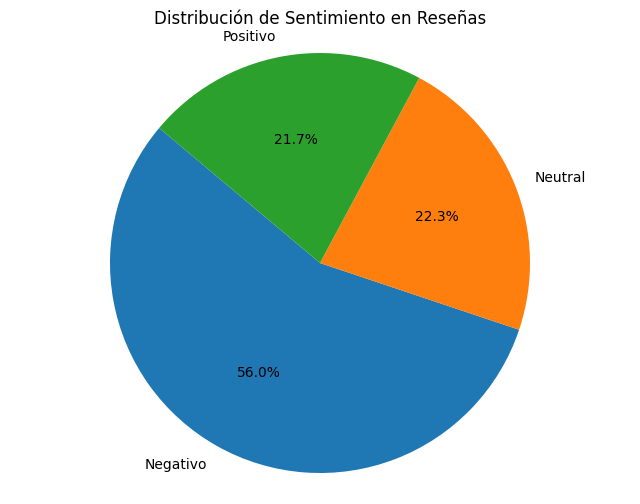

In [35]:
# Agrupar las reseñas por categoría de sentimiento y contar la cantidad en cada categoría
sentiment_counts = df_reviews_reviews["sentiment_analysis"].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=["Negativo", "Neutral", "Positivo"], autopct="%1.1f%%", startangle=140)
plt.title("Distribución de Sentimiento en Reseñas")
plt.axis("equal")  # Aspecto circular
plt.show()

### e) Gráfico de Línea de Tiempo de Sentimiento:

    Este gráfico lo que nos da es una idea de como va evolucionando  el sentimiento del jugador en general a través del tiempo. Por lo que se puede apreciar es una caía, segun jugadores, en la calidad general de los juegos, lo que debería analizarse para lograr fundamentos de la calidad general mala de los comentarios.

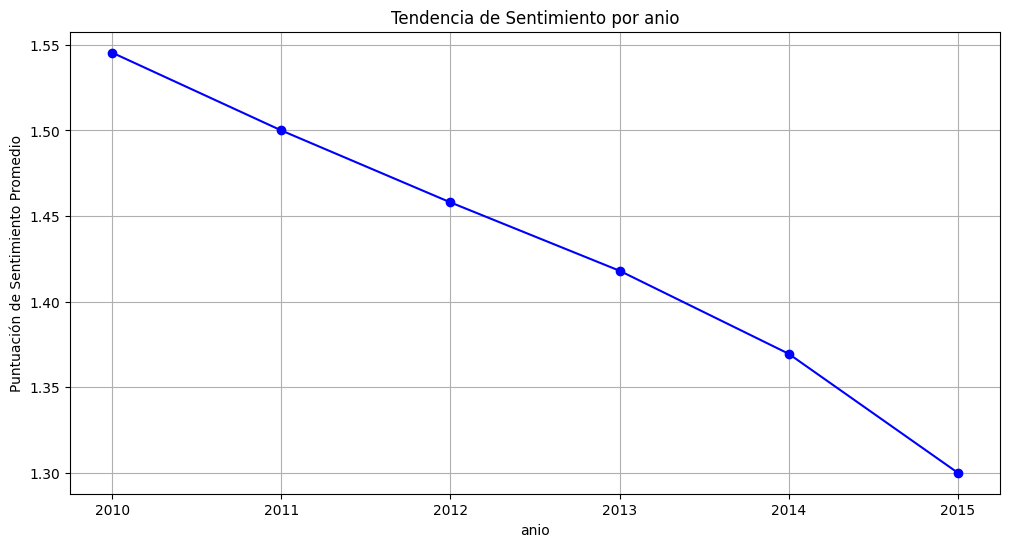

In [36]:
# Nos aseguramos de que la columna "posted" esté en formato datetime
df_reviews_reviews["posted"] = pd.to_datetime(df_reviews_reviews["posted"], errors="coerce")

# Agrupamos las reseñas por anio y calculamos el promedio de sentimiento para cada anio
sentiment_by_year = df_reviews_reviews.groupby(df_reviews_reviews["posted"].dt.year)["sentiment_analysis"].mean()

# Crear un gráfico de línea de tiempo por anio
plt.figure(figsize=(12, 6))
sentiment_by_year.plot(kind="line", marker="o", linestyle="-", color="b")
plt.title("Tendencia de Sentimiento por anio")
plt.xlabel("anio")
plt.ylabel("Puntuación de Sentimiento Promedio")
plt.grid(True)
plt.show()

## f) Guardar df en csv:

    Disminuimos el tamanio de uno de estos datasets para que se pueda subir a GitHub

In [37]:
# A propósito de disminuir el tamanio del archivo y que se pueda subir a GITHUB se realizara un truncamiento de los datos.

# Obtener una muestra aleatoria de 1000000 filas
df_items_items = df_items_items.sample(100000, random_state=0)

# Guardar df_items_items en un archivo CSV
df_items_items.to_csv("./datasets/df_items_items.csv", index=False)

# Guardar df_reviews_reviews en un archivo CSV
df_reviews_reviews.to_csv("./datasets/df_reviews_reviews.csv", index=False)

# Guardar df_games en un archivo CSV
df_games.to_csv("./datasets/df_games.csv", index=False)

# Guardar df_items en un archivo CSV
df_items.to_csv("./datasets/df_items.csv", index=False)

# Guardar df_reviews en un archivo CSV
df_reviews.to_csv("./datasets/df_reviews.csv", index=False)


# 3 - Carga

In [38]:
df_items_items = pd.read_csv("./datasets/df_items_items.csv")
df_reviews_reviews = pd.read_csv("./datasets/df_reviews_reviews.csv")
df_games = pd.read_csv("./datasets/df_games.csv")
df_items = pd.read_csv("./datasets/df_items.csv")
df_reviews = pd.read_csv("./datasets/df_reviews.csv")
df_games["release_date"] = pd.to_datetime(df_games["release_date"], errors="coerce")
df_reviews_reviews["posted"] = pd.to_datetime(df_reviews_reviews["posted"], errors="coerce")

<h1 style="text-align:center;">Apartado de Funciones para API</h1>


1 - def PlayTimeGenre( genero : str ): Debe devolver anio con mas horas jugadas para dicho género.

    # Ejemplo: "indie"

In [39]:
def PlayTimeGenre(genero: str):
    # Combinar los dataframes df_games y df_items_items utilizando la columna de identificación
    merged_df = df_games.merge(df_items_items, left_on="id", right_on="item_id")
    # Convertir genero y genres a minúsculas para hacer coincidencias insensibles a mayúsculas y minúsculas
    genero = genero.lower()
    # Convertir la columna "genres" a tipo cadena y luego a minúsculas
    merged_df["genres"] = merged_df["genres"].astype(str).str.lower()
    # Inicializar un diccionario para realizar un seguimiento del tiempo de juego por anio
    playtime_by_year = {}

    # Iterar a través de cada fila del dataframe combinado
    for index, row in merged_df.iterrows():
        # Verificar si el género proporcionado está en la lista de géneros de la fila actual
        if genero in row["genres"]:
            # Obtener el anio de la fecha de lanzamiento
            release_year = row["release_date"].year
            # Agregar las horas jugadas al contador correspondiente al anio de lanzamiento
            if release_year in playtime_by_year:
                playtime_by_year[release_year] += row["playtime_forever"]
            else:
                playtime_by_year[release_year] = row["playtime_forever"]

    # Encontrar el anio con más horas jugadas
    max_year = max(playtime_by_year, key=playtime_by_year.get)

    # Devolver el resultado como una respuesta JSON
    return {"anio de lanzamiento con más horas jugadas para el género " + genero: max_year}

In [40]:
print(PlayTimeGenre("indie"))

{'anio de lanzamiento con más horas jugadas para el género indie': 2006}


2 - def UserForGenre( genero : str ): Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por anio.

    # Ejemplo: "indie"

In [41]:
def get_max_playtime_user(df_games, df_items_items, genero):
    # Combinar los dataframes df_games y df_items_items utilizando la columna de identificación
    merged_df = df_games.merge(df_items_items, left_on="id", right_on="item_id")

    # Convertir genero y genres a minúsculas para hacer coincidencias insensibles a mayúsculas y minúsculas
    genero = genero.lower()
    # Convertir la columna "genres" a tipo cadena y luego a minúsculas
    merged_df["genres"] = merged_df["genres"].astype(str).str.lower()


    # Inicializar un diccionario para realizar un seguimiento de las horas jugadas por anio para el usuario específico
    playtime_by_year = {}

    # Inicializar una variable para realizar un seguimiento del usuario con más horas jugadas
    max_playtime_user = None
    max_playtime = 0

    # Iterar a través de cada fila del dataframe combinado
    for index, row in merged_df.iterrows():
        # Verificar si el género proporcionado está en la lista de géneros de la fila actual
        if genero in row["genres"]:
            # Obtener el usuario y las horas jugadas para la fila actual
            user_id = row["user_id"]
            playtime = row["playtime_forever"]
            # Verificar si el usuario actual tiene más horas jugadas que el máximo actual
            if user_id not in playtime_by_year:
                playtime_by_year[user_id] = []
            playtime_by_year[user_id].append({"anio": row["release_date"].year, "Horas": playtime})
            if playtime > max_playtime:
                max_playtime = playtime
                max_playtime_user = user_id

    return max_playtime_user, playtime_by_year[max_playtime_user]

In [42]:
genero = "indie"
max_playtime_user, playtime_data = get_max_playtime_user(df_games, df_items_items, genero)
print({"Usuario con más horas jugadas para Género " + genero: max_playtime_user, "Horas jugadas": playtime_data})


{'Usuario con más horas jugadas para Género indie': 765611983889673.0, 'Horas jugadas': [{'anio': 2006, 'Horas': 421652}]}


3 - def UsersRecommend( anio : int ): Devuelve el top 3 de juegos MÁS recomendados por usuarios para el anio dado. (reviews.recommend = True y comentarios positivos/neutrales)

    Ejemplo: 2015

In [43]:
def get_top_recommendations(df_reviews_reviews, df_items_items, anio):
    # Combinar los dataframes df_reviews_reviews y df_items_items utilizando la columna de identificación
    merged_df = df_reviews_reviews.merge(df_items_items, left_on="item_id", right_on="item_id")

    # Filtrar los juegos recomendados para el anio dado con análisis de sentimientos positivos y neutrales
    recommended_games = merged_df[(merged_df["recommend"] == True) & 
        (merged_df["posted"].dt.year == anio) & 
        ((merged_df["sentiment_analysis"] == 2) | (merged_df["sentiment_analysis"] == 1))]

    # Obtener los top 3 juegos más recomendados
    top_3_recommendations = recommended_games["item_name"].str.lower().value_counts().head(3).index.tolist()

    return top_3_recommendations

In [44]:
top_3_recommendations = get_top_recommendations(df_reviews_reviews, df_items_items, 2015)
print([{"Puesto 1": top_3_recommendations[0]}, 
                                 {"Puesto 2": top_3_recommendations[1]}, 
                                 {"Puesto 3": top_3_recommendations[2]}])

[{'Puesto 1': 'counter-strike: global offensive'}, {'Puesto 2': "garry's mod"}, {'Puesto 3': 'unturned'}]


4 - def UsersNotRecommend( anio : int ): Devuelve el top 3 de juegos MENOS recomendados por usuarios para el anio dado. (reviews.recommend = False y comentarios negativos)

    # Ejemplo: 2015

In [45]:
def get_top_not_recommendations(df_reviews_reviews, df_items_items, anio):
    # Combinar los dataframes df_reviews_reviews y df_items_items utilizando la columna de identificación
    merged_df = df_reviews_reviews.merge(df_items_items, left_on="item_id", right_on="item_id")

    # Filtrar los juegos no recomendados para el anio dado con análisis de sentimientos negativos
    not_recommended_games = merged_df[(merged_df["recommend"] == False) & 
                                      (merged_df["posted"].dt.year == anio) & 
                                      (merged_df["sentiment_analysis"] == 0)]

    # Obtener los top 3 juegos menos recomendados
    top_3_not_recommendations = not_recommended_games["item_name"].str.lower().value_counts().head(3).index.tolist()

    return top_3_not_recommendations

In [46]:
top_3_not_recommendations = get_top_not_recommendations(df_reviews_reviews, df_items_items, 2015)
print([
    {"Puesto 1": top_3_not_recommendations[0]}, 
    {"Puesto 2": top_3_not_recommendations[1]}, 
    {"Puesto 3": top_3_not_recommendations[2]}])

[{'Puesto 1': 'counter-strike: global offensive'}, {'Puesto 2': 'payday 2'}, {'Puesto 3': 'unturned'}]


5 - def sentiment_analysis( anio : int ): Según el anio de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento.

    # Ejemplo: 2015

In [47]:
# Definimos la función para el análisis de sentimientos
def sentiment_analysis(year: int, df_games: pd.DataFrame, df_reviews_reviews: pd.DataFrame):
    try:
        # Filtrar las reseñas de juegos lanzados en el anio especificado
        filtered_games = df_games[df_games["release_date"].dt.year == year]
        
        # Obtener los IDs de juegos lanzados en ese anio
        game_ids = filtered_games["id"].tolist()
        
        # Filtrar las reseñas de usuarios que corresponden a esos juegos
        filtered_reviews = df_reviews_reviews[df_reviews_reviews["item_id"].isin(game_ids)]
        
        # Realizar el conteo de las categorías de análisis de sentimiento
        sentiment_counts = filtered_reviews["sentiment_analysis"].value_counts().to_dict()
        
        # Agregar descripciones a las categorías
        sentiment_counts_with_description = {
            "Negative": sentiment_counts.get(0, 0),
            "Neutral": sentiment_counts.get(1, 0),
            "Positive": sentiment_counts.get(2, 0)
        }
        
        return sentiment_counts_with_description
    
    except Exception as e:
        # Manejar cualquier excepción que pueda ocurrir durante el proceso
        raise HTTPException(status_code=500, detail="Error interno del servidor")


In [48]:
# Llamar a la función de análisis de sentimientos y obtener los resultados
sentiment_counts = sentiment_analysis(2015, df_games, df_reviews_reviews)
    
# Devolver una respuesta JSON con el contenido generado
print(sentiment_counts)

{'Negative': 1100, 'Neutral': 891, 'Positive': 2470}


# Modelos de ML para Sistema de recomendación

Antes de todo, este apartado es para justificar y comprobar el funcionamiento de los algoritmos, debido a que en el archivo main no estarian funcionando la importacion de librerias por cuestiones que no se conocen. Aquí queda comprobado su funcionamiento.

## 1) Sistema de recomendación item-item:


En este ejemplo, utilizamos un algoritmo de Machine Learning llamado k-Nearest Neighbors (k-NN) para realizar recomendaciones de juegos. El algoritmo k-NN es un método de aprendizaje supervisado utilizado en tareas de clasificación y regresión, pero también puede aplicarse en tareas de recomendación, como en este caso.

    k-Nearest Neighbors (k-NN):

    El algoritmo k-NN se basa en la idea de que objetos similares tienden a estar cerca unos de otros en un espacio de características. Funciona de la siguiente manera:


In [49]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
import json

# Función para obtener recomendaciones
def get_recommendations(game_id):
    # Tratar los valores faltantes en las columnas "genres" y "tags" con "Desconocido"
    df_games["genres"].fillna("Desconocido", inplace=True)
    df_games["tags"].fillna("Desconocido", inplace=True)

    # Asegurarse de que las columnas "genres" y "tags" sean de tipo string
    df_games["genres"] = df_games["genres"].astype(str)
    df_games["tags"] = df_games["tags"].astype(str)

    # Realizar la eliminación de comillas simples
    df_games["genres"] = df_games["genres"].str.replace(""", "")
    df_games["tags"] = df_games["tags"].str.replace(""", "")

    # Convertir las columnas "genres" y "tags" a variables categóricas
    label_encoder = LabelEncoder()
    df_games["genres"] = label_encoder.fit_transform(df_games["genres"])
    df_games["tags"] = label_encoder.fit_transform(df_games["tags"])

    # Entrenar el modelo KNN
    knn = NearestNeighbors(n_neighbors=5, metric="euclidean")
    knn.fit(df_games[["genres", "tags"]])
    
    # Encontrar el juego más similar utilizando el modelo KNN
    game = df_games.loc[df_games["id"] == game_id, ["genres", "tags"]].values.reshape(1, -1)
    distances, indices = knn.kneighbors(game)

    # Obtener los nombres de las aplicaciones recomendadas
    recommended_app_names = df_games.iloc[indices[0]]["app_name"].tolist()
    
    # Crear un JSON con los nombres de las aplicaciones recomendadas
    recommendations_json = json.dumps({"recommendations": recommended_app_names})
    
    return recommendations_json

In [50]:
# Ejemplo de uso:
game_id = 774277  # Cambia esto por el ID del juego que desees consultar
recommendations = get_recommendations(game_id)
print(recommendations)

{"recommendations": ["SNOW - All Access Legend Pass", "SNOW - All Access Pro Pass", "SNOW - Starter Pack", "SNOW - Lifetime Pack", "High Profits"]}


c:\Users\londe\OneDrive\Programacion\2 - Henrry\Data Science\CLASES - DATA\PROYECTO INDIVIDUAL\PI_MLOps_04\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
